In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
X_numpy , y_numpy = datasets.make_regression(n_samples= 100 , n_features = 1 , noise= 10 , random_state=12)

In [3]:
X = torch.from_numpy(X_numpy.astype(np.float32))

In [4]:
y = torch.from_numpy(y_numpy.astype(np.float32))

In [5]:
y

tensor([ 2.4309e+01, -6.4191e+01, -1.2643e+01, -4.3021e+01, -3.4887e+01,
        -9.2955e+00, -1.7049e+01, -4.7203e+01,  1.9530e+01,  2.9655e+01,
         2.3712e+01,  3.0847e+00, -6.3820e+01, -2.8761e+01,  2.6977e+01,
         2.0820e+01,  3.8842e+01, -2.9396e+01, -2.0514e+01, -3.5781e+01,
        -2.5446e+00,  8.6087e+01,  5.2707e+01, -3.3258e+01,  5.5191e+01,
        -4.1328e+01, -5.6502e+01,  2.7230e+01, -4.9829e+01,  4.8328e+01,
        -3.8969e+01, -3.8664e-01,  6.0466e+00,  6.4042e+01,  2.9658e+01,
         3.2210e+01, -4.8685e+00, -4.9175e+01, -7.4883e+01,  1.1051e+01,
        -8.1055e+01, -2.9020e+01,  8.6147e-01,  1.2578e+01,  1.9425e+01,
        -1.4277e+01,  8.7875e+00, -2.5061e+01, -1.8161e+01,  2.5888e+01,
        -2.3071e+01, -1.1381e+01,  1.0451e+01, -1.7736e+00, -4.5711e+01,
         2.9819e+01, -1.3348e+01, -5.8632e+01,  2.1626e+01,  5.1401e+01,
        -2.5145e+01,  2.6930e+01,  6.2985e+00,  4.3723e+00,  6.0750e+00,
         2.1395e+01, -3.1120e+01,  4.4311e+01,  7.9

In [6]:
y = y.view(y.shape[0],1)

In [7]:
y.shape

torch.Size([100, 1])

In [8]:
n_samples , n_features = X.shape

In [10]:
input_size = n_features
output_size = 1

In [15]:
##Model building
class linearRegression(nn.Module):
    def __init__(self , input_dim, output_dim):
        super(linearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self,X):
        return self.lin(X)
        

In [16]:
model = linearRegression(input_size, output_size)

In [18]:
## LOss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [21]:
for epoch in range(1000):
    #forward
    y_pred = model(X)
    loss = criterion(y_pred , y)
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch : {epoch +1} , loss = {loss.item():.4f}')
        


epoch : 10 , loss = 1070.7035
epoch : 20 , loss = 1027.8895
epoch : 30 , loss = 986.9913
epoch : 40 , loss = 947.9221
epoch : 50 , loss = 910.5991
epoch : 60 , loss = 874.9434
epoch : 70 , loss = 840.8795
epoch : 80 , loss = 808.3353
epoch : 90 , loss = 777.2424
epoch : 100 , loss = 747.5348
epoch : 110 , loss = 719.1506
epoch : 120 , loss = 692.0295
epoch : 130 , loss = 666.1151
epoch : 140 , loss = 641.3524
epoch : 150 , loss = 617.6900
epoch : 160 , loss = 595.0781
epoch : 170 , loss = 573.4695
epoch : 180 , loss = 552.8192
epoch : 190 , loss = 533.0840
epoch : 200 , loss = 514.2225
epoch : 210 , loss = 496.1958
epoch : 220 , loss = 478.9664
epoch : 230 , loss = 462.4985
epoch : 240 , loss = 446.7581
epoch : 250 , loss = 431.7123
epoch : 260 , loss = 417.3303
epoch : 270 , loss = 403.5822
epoch : 280 , loss = 390.4396
epoch : 290 , loss = 377.8756
epoch : 300 , loss = 365.8642
epoch : 310 , loss = 354.3807
epoch : 320 , loss = 343.4019
epoch : 330 , loss = 332.9050
epoch : 340 , los

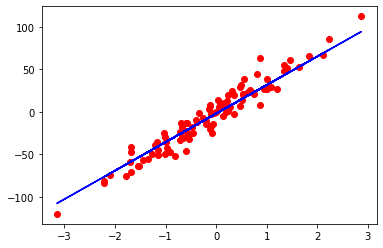

In [24]:
#PLotting

predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy , predicted, "b")
plt.show()